In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Importing datasets
nat_ws_price = 'NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv'
nat_ws_price_df = pd.read_csv(nat_ws_price,encoding='unicode_escape')
nat_ws_price_df.head()


,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808


In [28]:
#getting the descriptive statistics of the dataset 
nat_ws_price_df.describe()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
count,720.000000,720.000000,720.000000
mean,2012.491667,123.833333,113.982091
std,2.871361,56.759258,162.115749
min,2008.000000,91.000000,0.007000
25%,2010.000000,93.000000,15.141000
50%,2012.500000,100.000000,52.390000
75%,2015.000000,109.000000,140.122500
max,2017.000000,250.000000,920.550000


In [29]:
#cleaning the dataset
nat_ws_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


There are no null values or missing values so we can go ahead and do an analysis of the dataset

# Univariate Analysis

##  Nationwide Dataset Analysis 

In [30]:
# calling the coulmns and finding out what categories they are.
nat_ws_price_df.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

We have 5 columns in total. For the columns 'YEAR', 'MONTH', 'COMMODITY', and 'WEIGHT, KG PER BAG', we would perform a value_count on them as they do not contain numerical values. Though the **'YEAR'** and **'WEIGHT, KG PER BAG'** columns contains numbers these figures have a consistent trend(there are no differences in them to be able to carry out further analysis). For the ' PRICE, ¢ GH' column we would do a non graphical and graphical analysis on it.

## Year Analysis


In [31]:
#getting the value count of year column
nat_ws_price_df.YEAR.value_counts()

2013    78
2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
2014    66
Name: YEAR, dtype: int64

The year **2013** is 78 and **2014** is also 66 but they both need to be 72


In [32]:
#checking to see where the error is
nat_ws_price_df.loc[nat_ws_price_df['YEAR']==2013].head(15)

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
60,2013,JANUARY,MAIZE,100,33.436
61,2013,FEBRUARY,MAIZE,100,34.731
62,2013,MARCH,MAIZE,100,35.125
63,2013,APRIL,MAIZE,100,34.793
64,2013,MAY,MAIZE,100,36.110
65,2013,JUNE,MAIZE,100,42.802
66,2013,JULY,MAIZE,100,44.508
67,2013,AUGUST,MAIZE,100,47.169
68,2013,SEPTEMBER,MAIZE,100,46.624
69,2013,OCTOBER,MAIZE,100,50.594


2013 January is duplicated and 2014 has no January.
To fix the error, we would take a template of one of the correct years(Year 2016) and replace it with the year '2013' and '2014'

In [33]:
#to drop the 2013 and 2014 rows , the drop function won't help in this case so we would use the loc function(which deletes by selecting the data we want t o keep)
nat_ws_price_df = nat_ws_price_df.loc[(nat_ws_price_df['YEAR'] != 2013) & (nat_ws_price_df['YEAR'] != 2014)]

#NB: do not use == for the code it will delete the data you want to keep. 

Let's check if the YEAR 2013 and 2014 have been dropped

In [34]:
nat_ws_price_df.YEAR.value_counts()

2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
Name: YEAR, dtype: int64

We can se that 2013 and 2014 have been dropped now we have to replace them with the 2016 year template.
To do that we would create two dataframes from the 2016 year and replace 2016 with 2013 an 2014 respectively

In [35]:
# creating year 2013 and 2014 data
yr_2013_data = nat_ws_price_df.loc[nat_ws_price_df['YEAR'] == 2015].replace(2015, 2013)
yr_2014_data = nat_ws_price_df.loc[nat_ws_price_df['YEAR'] == 2015].replace(2015, 2014)
#NB: if the dataframe name is nat_ws_price_df, this will alter the dataframe to just 2013 year data.

Now that we have the newly created data for Year 2013 and 2014 we have to add it to the dataframe(nat_ws_price_df)

In [36]:
#adding 2013 and 2014 data to nat_ws_price_df
#NB: we concatenate not merge the data, IF THE CODE IS PASSED WITHOUT sorted it returns this error:AttributeError: 'DataFrame' object has no attribute 'concat'
nat_ws_price_df = pd.concat([nat_ws_price_df, yr_2013_data, yr_2014_data]).sort_values('YEAR')

In [37]:
nat_ws_price_df.YEAR.value_counts()

2008    72
2009    72
2010    72
2011    72
2012    72
2013    72
2014    72
2015    72
2016    72
2017    72
Name: YEAR, dtype: int64

## Month Analysis


In [38]:
nat_ws_price_df.MONTH.value_counts()

JANUARY      60
MARCH        60
APRIL        60
MAY          60
JUNE         60
JULY         60
AUGUST       60
SEPTEMBER    60
OCTOBER      60
NOVEMBER     60
FEBRUARY     60
DECEMBER     60
Name: MONTH, dtype: int64

## Commodity Analysis

In [39]:
nat_ws_price_df.COMMODITY.value_counts()

MAIZE         120
SORGHUM       120
YAM           120
LOCAL RICE    120
MILLET        120
COCOYAM       120
Name: COMMODITY, dtype: int64

There are 6 types of crops that we are analysing


## Weight Analysis

In [41]:
nat_ws_price_df['WEIGHT, KG PER BAG'].value_counts()

100    240
109    120
250    120
93     120
91     120
Name: WEIGHT, KG PER BAG, dtype: int64

**We would later find out which commodity weighs what and to see if produce with high weigts resulted in higher prices if produce with lesser weights resulted in much prices then we should invest in producing more of that. Just to see the produce people consumed most.**

### Price

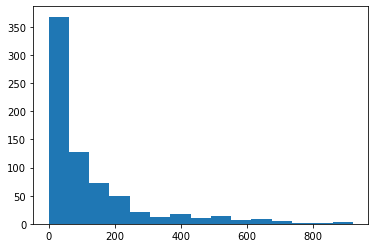

In [42]:
#Because this is a numerical column we woud do a a histogram and boxplot analysis of the price column 
plt.hist(nat_ws_price_df[' PRICE, ¢ GH'], bins = 15)
plt.show()

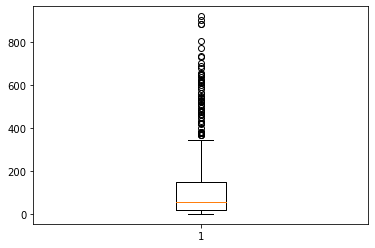

In [43]:
plt.boxplot(nat_ws_price_df[' PRICE, ¢ GH'])
plt.show()

In [44]:
#There are a alot of outliers lets see the outlier range
# Useful parameters
price_first_quartile = 15.141000
price_second_quartile = 52.390000
price_third_quartile = 140.122500
price_mean = 140.122500
price_IQR = price_third_quartile - price_first_quartile
price_outlier_range = price_third_quartile + (1.5 * price_IQR)
print(price_outlier_range)

327.59475


In [45]:
len(nat_ws_price_df.loc[nat_ws_price_df[' PRICE, ¢ GH'] > price_second_quartile])

368

**368(51%)** of the commodities have their prices greater than the median(140.01). **This implies that more than half of all the commodities have high prices.**  

## MULTIVARIATE ANALYSIS

In [46]:
#multivariate analysis on the  year and price column to see if there was a decline on increase in price over the years

In [21]:
nat_ws_price_df.groupby(['YEAR'])[' PRICE, ¢ GH'].sum()

YEAR
2008     8510.1800
2009    10346.7510
2010    11188.0400
2011     3419.0220
2012     4734.8210
2013     7870.1391
2014     7870.1391
2015     7870.1391
2016    11001.6510
2017    12653.3621
Name:  PRICE, ¢ GH, dtype: float64

**2011** had the **lowest sales** and **2017** had the **highest sales**. Sales from 2008 to 2010 had a steady growth but in 2011(which is the lowest sales recored) there was a decline but sales gradually increased over the subsequent years from 2012 till 2017(which is highest sales reecorded)

In [22]:
#Finding out if the weight of produce made per YEAR, affects the sales in a year

nat_ws_price_df.groupby(['YEAR'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].agg(["sum", "min", "max", "mean"])

C:\Users\Lillian\AppData\Local\Temp/ipykernel_17364/2671295210.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nat_ws_price_df.groupby(['YEAR'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].agg(["sum", "min", "max", "mean"])


WEIGHT, KG PER BAG                       PRICE, ¢ GH                 \
                    sum min  max        mean          sum    min     max   
YEAR                                                                       
2008               8916  91  250  123.833333    8510.1800  0.131  689.87   
2009               8916  91  250  123.833333   10346.7510  3.317  920.55   
2010               8916  91  250  123.833333   11188.0400  4.382  884.20   
2011               8916  91  250  123.833333    3419.0220  0.007  202.10   
2012               8916  91  250  123.833333    4734.8210  0.010  280.46   
2013               8916  91  250  123.833333    7870.1391  0.010  378.35   
2014               8916  91  250  123.833333    7870.1391  0.010  378.35   
2015               8916  91  250  123.833333    7870.1391  0.010  378.35   
2016               8916  91  250  123.833333   11001.6510  0.010  524.89   
2017               8916  91  250  123.833333   12653.3621  0.020  637.65   

                  
            mean  
YEAR              
2008  118.196944  
2009  143.704875  
2010  155.389444  
2011   47.486417  
2012   65.761403  
2013  109.307488  
2014  109.307488  
2015  109.307488  
2016  152.800708  
2017  175.741140

We can see that the weight across the various years is the same except for 2014 and 2013. The mean, maximum and minimum weight is the same across all Years. W

THINGS TO INVESTIGATE:1. Why then was there a decline in 2011 though the same weight was produces in previous years
    
2. What resulted in  the increase from 2012 to 2017 considering the same weight was produced.
    

Finding out if there price is affected by the type of commodity

In [47]:
#plotting Commodity against weight and Price
nat_ws_price_df.groupby(['COMMODITY'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].sum()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_17364/2894854534.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nat_ws_price_df.groupby(['COMMODITY'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].sum()


,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
COMMODITY,,
COCOYAM,10920,12849.5300
LOCAL RICE,12000,10191.9633
MAIZE,12000,6401.0251
MILLET,11160,1485.9590
SORGHUM,13080,22703.7570
YAM,30000,31832.0100


C:\Users\Lillian\AppData\Local\Temp/ipykernel_17364/3626243613.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nat_ws_price_df.groupby(['COMMODITY'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10),


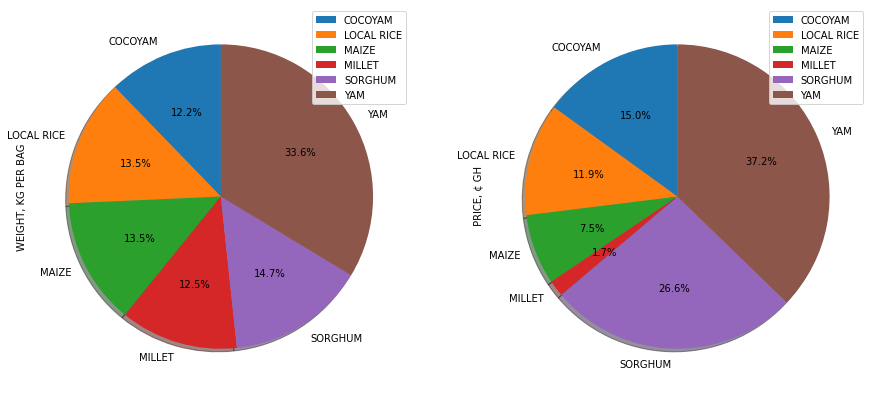

In [49]:
nat_ws_price_df.groupby(['COMMODITY'])['WEIGHT, KG PER BAG',' PRICE, ¢ GH'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')
plt.show()

Local Rice contributes to 13.5% of the weight but yields 11.9% in prices
Yam contributes to 33.6% of the weight but yields 36.9% in prices
Cocoyam contributes to 12.2% of the weight but yields 14.9% in prices
Maize contributes to 13.5% of the weight but yields 6.9% in prices 
Millet contributes to 12.5% of the weight but yields 1.5% in prices 
Sorghum contributes to 14.7% of the weight but yields 27.7% in prices 

**We can see that Maize and Millet are nod yielding much prices as compared to weight produced . But though Sorghum contributes just a litlle above Maize and Millet in weight, it's the second highest in prices yield**. 


In [50]:
corr = nat_ws_price_df.corr()
corr.style.background_gradient()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
YEAR,1.000000,-0.000000,0.061601
"WEIGHT, KG PER BAG",-0.000000,1.000000,0.420618
"PRICE, ¢ GH",0.061601,0.420618,1.000000


All columns have high correlation except the YEAR column